# Region Based Analysis

This notebook shows the usage of _BlobMetrics_ class to do region based cell count

Package import

In [1]:
from tifffile import imread, imsave
import numpy as np
from src.BlobDetector import BlobDetector
from src.BlobMetrics import BlobMetrics

The first step would be to give the raw brain image to the _BlobDetector_ package to get the centroids

In [2]:
raw_img_path = 'data/region/reg_raw.tiff'
detector = BlobDetector(raw_img_path, n_components=3)
centroids = detector.get_blob_centroids()

Next we want to do the region based analysis. For this two files are needed
* Registered atlast image of the brain which has the region numbers as its intensity value
* Ontology JSON which has the region number to name mapping

In [3]:
reg_img_path = 'data/region/reg_atlas.tiff'
ontology_json_path = 'data/region/ara_structure_ontology.json'

metrics = BlobMetrics([], centroids, 12)
region_stats = metrics.get_region_based_count(ontology_json_path, reg_img_path)
print(region_stats)

Processing centroid [153.0, 160.0, 152.0]: 100%|██████████| 81/81 [00:00<00:00, 576.42it/s]

{'Primary somatosensory area, nose, layer 6a': 1, 'Supplemental somatosensory area, layer 6a': 1, 'Primary somatosensory area, barrel field, layer 6a': 3, 'Primary somatosensory area, upper limb, layer 2/3': 3, 'Primary somatosensory area, upper limb, layer 4': 1, 'background': 4, 'internal capsule': 1, 'Superior colliculus, motor related, intermediate gray layer': 3, 'Lateral posterior nucleus of the thalamus': 1, 'Striatum': 1, 'Suprageniculate nucleus': 1, 'Caudoputamen': 23, 'Supplemental somatosensory area, layer 5': 6, 'Orbital area, lateral part, layer 6a': 1, 'Gustatory areas, layer 6a': 3, 'Globus pallidus, external segment': 4, 'Basolateral amygdalar nucleus, anterior part': 3, 'Pallidum': 1, 'Supramammillary nucleus': 2, 'Endopiriform nucleus, dorsal part': 2, 'external capsule': 1, 'Lateral hypothalamic area': 4, 'Hypothalamus': 6, 'Paraventricular hypothalamic nucleus': 1, 'Posterior hypothalamic nucleus': 3, 'columns of the fornix': 1}


The `region_stats` variable has the region name along with the number of cells in that region. Now let's visualize the results

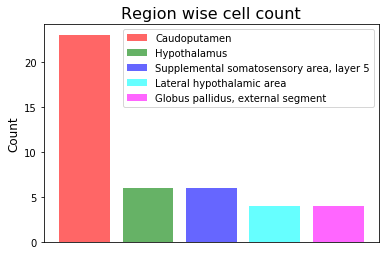

In [4]:
metrics.plot_region_based_count(region_stats)